# Image Classification with Hugging Face

In [24]:
# IMPORTS:
from transformers import ViTFeatureExtractor, ViTForImageClassification
import torch
import matplotlib.pyplot as plt

array([[[190, 190, 190],
        [237, 237, 237],
        [255, 255, 255],
        ...,
        [185, 185, 185],
        [222, 222, 222],
        [248, 248, 248]],

       [[184, 184, 184],
        [243, 243, 243],
        [255, 255, 255],
        ...,
        [177, 177, 177],
        [222, 222, 222],
        [255, 255, 255]],

       [[213, 213, 213],
        [226, 226, 226],
        [222, 222, 222],
        ...,
        [208, 208, 208],
        [220, 220, 220],
        [231, 231, 231]],

       ...,

       [[227, 227, 227],
        [217, 217, 217],
        [212, 212, 212],
        ...,
        [223, 223, 223],
        [222, 222, 222],
        [211, 211, 211]],

       [[255, 255, 255],
        [199, 199, 199],
        [177, 177, 177],
        ...,
        [254, 254, 254],
        [216, 216, 216],
        [181, 181, 181]],

       [[255, 255, 255],
        [201, 201, 201],
        [182, 182, 182],
        ...,
        [254, 254, 254],
        [216, 216, 216],
        [183, 183, 183]]], dtype=uint8)
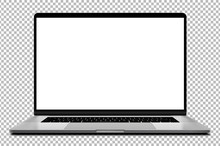

In [7]:
# Loading the image which was downloaded from the web
image = plt.imread("laptop.jpeg")
image

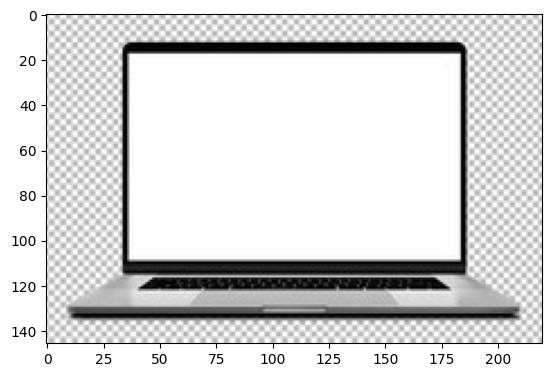

In [8]:
# Displaying the image
plt.imshow(image)

# 1. Image Classification

- **vit-base-patch16-224** model = popular choice for various computer vision tasks, it has a patch size of 16x16 and trained on 224x224 pixel images
- **patch size** = refers to the dimensions or size of a rectangular region or "patch" that is extracted from an image

In [3]:
model_name = "google/vit-base-patch16-224"
# Loading the feature extractor for the vision transformer
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
# Loading the base model
model = ViTForImageClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [12]:
# Extracting Features from the image
inputs = feature_extractor(images = image, return_tensors = "pt")
inputs

{'pixel_values': tensor([[[[0.4902, 0.8510, 0.9922,  ..., 0.4667, 0.7490, 0.9451],
          [0.4667, 0.8667, 0.9922,  ..., 0.4353, 0.7490, 0.9686],
          [0.4745, 0.8745, 0.9608,  ..., 0.4353, 0.7490, 0.9765],
          ...,
          [0.9686, 0.5843, 0.4275,  ..., 0.9451, 0.6941, 0.4510],
          [1.0000, 0.5765, 0.4196,  ..., 0.9765, 0.6863, 0.4275],
          [1.0000, 0.5843, 0.4353,  ..., 0.9765, 0.6863, 0.4353]],

         [[0.4902, 0.8510, 0.9922,  ..., 0.4667, 0.7490, 0.9451],
          [0.4667, 0.8667, 0.9922,  ..., 0.4353, 0.7490, 0.9686],
          [0.4745, 0.8745, 0.9608,  ..., 0.4353, 0.7490, 0.9765],
          ...,
          [0.9686, 0.5843, 0.4275,  ..., 0.9451, 0.6941, 0.4510],
          [1.0000, 0.5765, 0.4196,  ..., 0.9765, 0.6863, 0.4275],
          [1.0000, 0.5843, 0.4353,  ..., 0.9765, 0.6863, 0.4353]],

         [[0.4902, 0.8510, 0.9922,  ..., 0.4667, 0.7490, 0.9451],
          [0.4667, 0.8667, 0.9922,  ..., 0.4353, 0.7490, 0.9686],
          [0.4745, 0.8745

In [14]:
# Extracting pixel values from the image
pixel_values = inputs["pixel_values"]

# Making predictions for the image using the pre-trained model
outputs = model(pixel_values)

In [16]:
# Extracting the different probability scores = logits (raw scores) for different classes
logits = outputs.logits
logits.shape

torch.Size([1, 1000])

- This means this model is being trained on 1000 classes
- After running our model on the input image, it generates a probability score for each of the classes that the model has been trained on

In [18]:
# Finding the index of the predicted class with the highest probability
predicted_class_idx = logits.argmax(-1).item()
predicted_class_idx

681

- So the predicted class has an index of 681

In [21]:
# Getting the predicted class name from the index
predicted_class = model.config.id2label[predicted_class_idx]
predicted_class

'notebook, notebook computer'

- We can see the classification was correct!

# 2. Zero-Shot Image Classification

- Now we will be classifying images into categories which the model had not seen during training
- A model that excels at this task is **openai/clip-vit-large-patch14**

### Loading the pre-trained model

In [23]:
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

# Loading the pre-trained model and its pre-processor
model_name = "openai/clip-vit-large-patch14"
model = AutoModelForZeroShotImageClassification.from_pretrained(model_name)
processor = AutoProcessor.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

### Loading the image to be classified

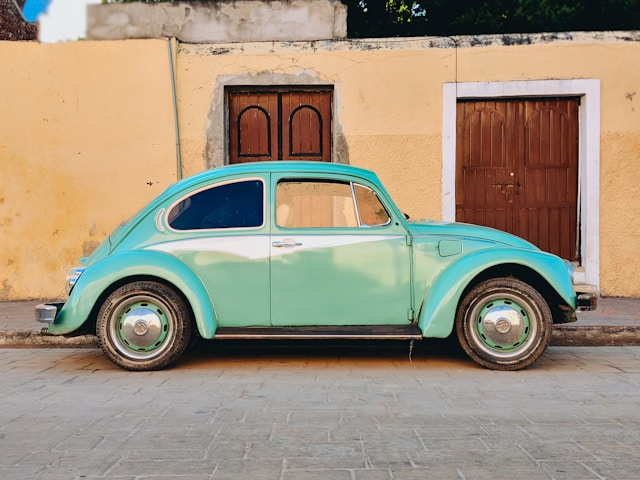

In [25]:
from PIL import Image
import requests

# URL of image we want to classify
url = "https://unsplash.com/photos/xBRQfR2bqNI/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjc4Mzg4ODEx&force=true&w=640"

# Opening the image from the URL
image = Image.open(requests.get(url, stream = True).raw)
image

- This is a task where you get your model to learn labels which it has not seen during training
- So we must provide a list of candidate labels

### Extracting features from the image using the processor

In [28]:
# Preparing candidate labels
candidate_labels = ["tree", "car", "bike", "cat"]

# Preparing the inputs for the zero-shot image classification model
inputs = processor(images = image, text = candidate_labels, return_tensors = "pt", padding = True)

### Generating the prediction

In [33]:
import torch

# Performing the inference
with torch.no_grad(): # This is here to save computational power
  outputs = model(**inputs)

# Extracting logits
logits = outputs.logits_per_image[0]
# Getting the probabilities for each class
probs = logits.softmax(dim = -1).numpy()
probs

array([2.4006814e-04, 9.9904805e-01, 6.8578258e-04, 2.6098211e-05],
      dtype=float32)

In [36]:
# Converting the probability scores to a list
scores = probs.tolist()

# Creating a list of results, sorted by scores in desc. order
result = [
    {"score": score, "label": candidate_labels}
    for score, candidate_labels in sorted(zip(probs, candidate_labels), key = lambda x: -x[0])
]

# Displaying the result
result

[{'score': 0.99904805, 'label': 'car'},
 {'score': 0.0006857826, 'label': 'bike'},
 {'score': 0.00024006814, 'label': 'tree'},
 {'score': 2.609821e-05, 'label': 'cat'}]

- We have a dictionary with the scores and the labels
- For each label we have a corresponding score
- We can see the model has given the highest probability to the correct label = car

# 3. Zero-Shot Object Detection In an Image

- A great model for this is **google/owlvit-base-patch32** as it is suitable for detecting smaller objects within an image

### Loading the pre-trained model

In [56]:
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

# Loading the pre-trained model and its pre-processor
model_name = "google/owlvit-base-patch32"
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_name)
processor = AutoProcessor.from_pretrained(model_name)

### Loading the image to be classified

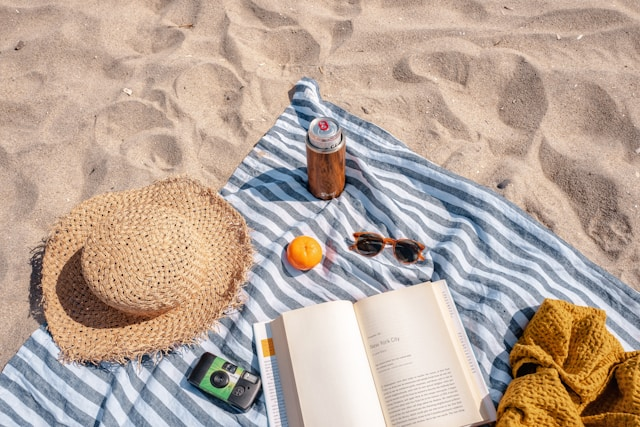

In [57]:
from PIL import Image
import requests

# URL of image we want to classify
url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"

# Opening the image from the URL
image = Image.open(requests.get(url, stream = True).raw)
image

- This image includes many objects like orange, phone, hat, book

### Extracting features from the image using the processor

In [58]:
# Providing a list of textual queries describing the objects we see
text_queries = ["hat", "book", "sunglasses", "camera", "tangerine"]

# Preparing the inputs for the zero-shot object detection
inputs = processor(text = text_queries, images = image, return_tensors = "pt")

### Generating the prediction

In [59]:
from PIL import ImageDraw

# Performing the inference
with torch.no_grad(): # This is here to save computational power
  outputs = model(**inputs)
  target_sizes = torch.tensor([image.size[::-1]]) # Creating a tensor which specifies the target size of the image
  results = processor.post_process_object_detection(outputs, threshold = 0.1, target_sizes = target_sizes)[0]

# Creating a drawing object for the image
draw = ImageDraw.Draw(image)

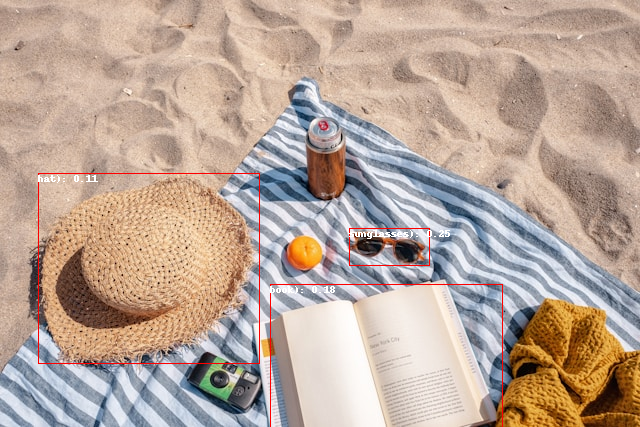

In [60]:
# Extracting detection results (scores, labels, bounding boxes)
scores = results["scores"].tolist()
labels = results["labels"].tolist()
boxes = results["boxes"].tolist()

# Iterating over the detected objects and drawing bounding boxes and labels
for box, score, label in zip(boxes, scores, labels):
  xmin, ymin, xmax, ymax = box # Specifying the coordinates of the bounding boxes
  draw.rectangle((xmin, ymin, xmax, ymax), outline = "red", width = 1) # This draws the bounding box around the detected objects using the specified coordinates
  draw.text((xmin, ymin), f"{text_queries[label]}): {round(score, 2)}", fill = "white")

# Displaying the image with the bounding boxes and labels
image

- As we can see, the model detected not all objects in the image, but still quite decent